In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [44]:
# Display the row's columns and data in dictionary format

first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24c0b82bd08>,
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'elevation': 0.914,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'id': 0}

In [45]:
# Display the row's columns and data in dictionary format

first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24c0b839f88>,
 'station': 'USC00519397',
 'prcp': 2.0,
 'date': '2010-01-01',
 'id': 0,
 'tobs': 18.3}

# Exploratory Precipitation Analysis

In [46]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date[0]

'2017-08-23'

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 


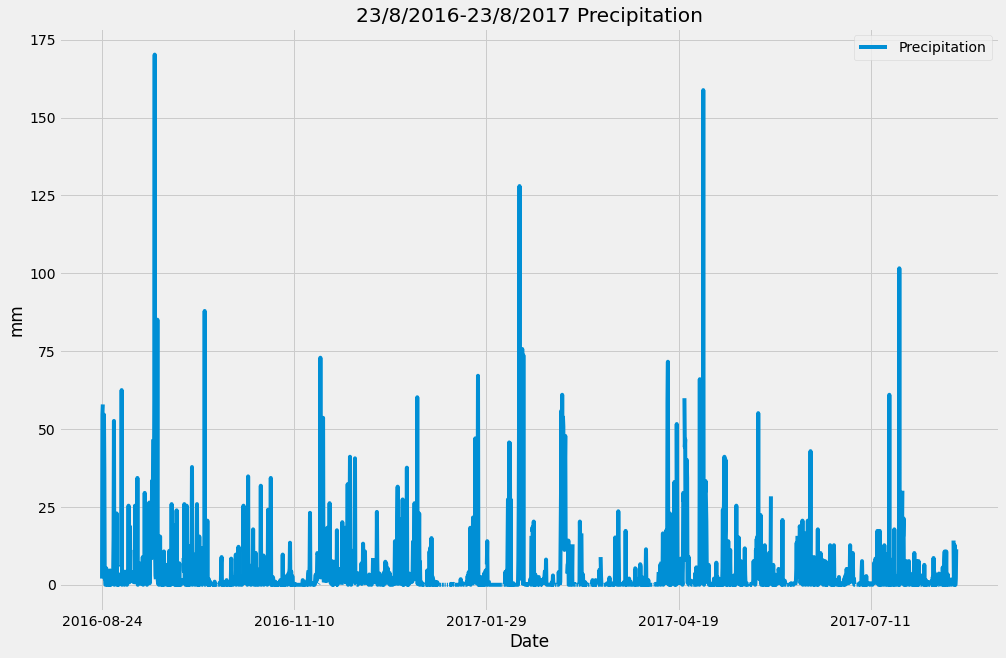

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query( Measurement.date).filter((Measurement.date))

# Calculate the date one year from the last date in data set.
one_year_from_most_recent_date = dt.datetime(2017,8,23)-dt.timedelta(days=365)
one_year_from_most_recent_date
# Perform a query to retrieve the data and precipitation scores
last_12_months_precipitation = session.query(Measurement.date, Measurement.prcp).filter((Measurement.date >= one_year_from_most_recent_date)).order_by(Measurement.date).all()
last_12_months_precipitation

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_date_df = pd.DataFrame(last_12_months_precipitation, columns=["Date", "Precipitation"])
precipitation_date_df

# Sort the dataframe by date
precipitation_date_df.set_index("Date", inplace=True)
precipitation_date_df

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_date_df.plot(figsize=(15,10))
plt.xlabel("Date")
plt.ylabel("mm")
plt.title("23/8/2016-23/8/2017 Precipitation")
# plt.savefig("Images/precipitation_plot.png")
plt.show()



In [60]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_date_df["Precipitation"].describe()

count    2015.000000
mean        4.485112
std        11.690532
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number stations in the dataset
total_number_of_stations = session.query(Station.station).count()
total_number_of_stations
print("The total number of stations in the dataset is {}".format(total_number_of_stations))

The total number of stations in the dataset is 9


In [62]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station, func.count(Measurement.station), Measurement.date]
active_stations=session.query(*sel).group_by(Measurement.station).order_by(sel[1].desc()).all()
active_stations

[('USC00519281', 2772, '2010-01-01'),
 ('USC00519397', 2724, '2010-01-01'),
 ('USC00513117', 2709, '2010-01-01'),
 ('USC00519523', 2669, '2010-01-01'),
 ('USC00516128', 2612, '2010-01-01'),
 ('USC00514830', 2202, '2010-03-01'),
 ('USC00511918', 1979, '2010-01-01'),
 ('USC00517948', 1372, '2010-05-03'),
 ('USC00518838', 511, '2010-01-01')]

In [63]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_name = active_stations[0][0]
active_station_name

'USC00519281'

In [64]:
tobsmin = [func.min(Measurement.tobs )]
min_for_tobs = session.query(*tobsmin).filter((Measurement.station) == active_station_name).all()
min_for_tobs
print("The minimum temperature for statio {} is {}".format(active_station_name, min_for_tobs[0][0]))

The minimum temperature for statio USC00519281 is 12.2


In [65]:
tobsmax = [func.max(Measurement.tobs )]
max_for_tobs = session.query(*tobsmax).filter((Measurement.station) == active_station_name).all()
max_for_tobs
print("The maximum temperature for statio {} is {}".format(active_station_name, max_for_tobs[0][0]))

The maximum temperature for statio USC00519281 is 29.4


In [66]:
tobsavg = [func.avg(Measurement.tobs )]
avg_for_tobs = session.query(*tobsavg).filter((Measurement.station) == active_station_name).all()
avg_for_tobs
print("The average temperature for statio {} is {}".format(active_station_name, avg_for_tobs[0][0]))

The average temperature for statio USC00519281 is 22.03582251082252


In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_tobs = session.query(Measurement.tobs, Measurement.date).filter((Measurement.station) == active_station_name).order_by(Measurement.date.desc()).first()
last_12_months_tobs = last_12_months_tobs[1]
last_12_months_tobs

'2017-08-18'

In [68]:
last_12_months_tobs_data = session.query(Measurement.tobs).filter((Measurement.station) == active_station_name).filter(Measurement.date > '2016-08-18').order_by(Measurement.date.desc()).all()
last_12_months_tobs_data

[(26.1),
 (24.4),
 (24.4),
 (25.0),
 (25.0),
 (25.0),
 (28.3),
 (27.8),
 (25.0),
 (24.4),
 (27.2),
 (27.8),
 (27.2),
 (24.4),
 (23.9),
 (25.0),
 (23.9),
 (27.8),
 (25.0),
 (25.0),
 (25.0),
 (24.4),
 (24.4),
 (24.4),
 (26.7),
 (26.7),
 (24.4),
 (23.3),
 (23.3),
 (22.2),
 (20.6),
 (25.6),
 (25.6),
 (23.9),
 (23.3),
 (25.0),
 (25.6),
 (24.4),
 (27.2),
 (26.1),
 (24.4),
 (24.4),
 (25.0),
 (24.4),
 (22.8),
 (21.7),
 (25.0),
 (22.2),
 (22.2),
 (23.3),
 (22.2),
 (22.2),
 (23.9),
 (26.1),
 (22.8),
 (23.9),
 (23.3),
 (24.4),
 (23.3),
 (23.3),
 (23.3),
 (22.2),
 (23.9),
 (23.9),
 (23.9),
 (23.9),
 (25.0),
 (24.4),
 (24.4),
 (26.7),
 (23.9),
 (22.2),
 (23.3),
 (26.7),
 (23.3),
 (23.3),
 (23.3),
 (23.3),
 (21.7),
 (21.7),
 (23.3),
 (24.4),
 (20.0),
 (20.6),
 (23.3),
 (23.3),
 (23.3),
 (25.0),
 (24.4),
 (23.9),
 (21.1),
 (23.3),
 (19.4),
 (21.1),
 (23.9),
 (26.1),
 (21.1),
 (23.9),
 (21.1),
 (23.9),
 (18.3),
 (15.6),
 (22.2),
 (19.4),
 (21.1),
 (23.3),
 (22.2),
 (20.0),
 (24.4),
 (22.2),
 (20.6),
 

In [69]:
tobs_df = pd.DataFrame(last_12_months_tobs_data, columns=["Tobs"])
tobs_df

Tobs
0    26.1
1    24.4
2    24.4
3    25.0
4    25.0
..    ...
351  25.0
352  25.6
353  26.1
354  27.2
355  26.1

[356 rows x 1 columns]

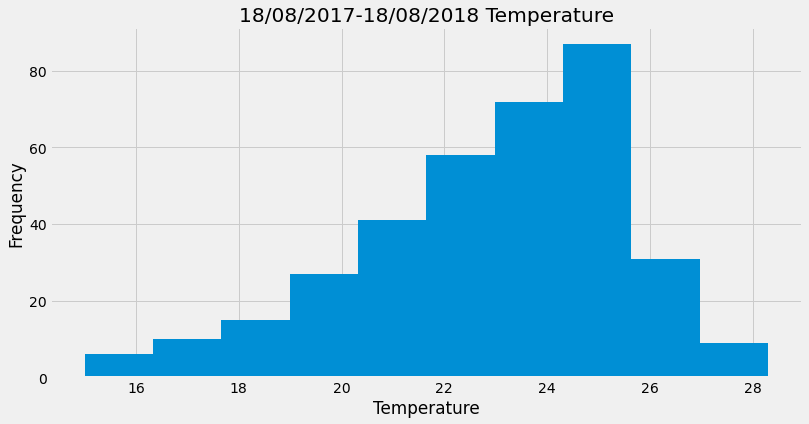

In [71]:
plt.figure(figsize=(12,6))
plt.hist(tobs_df["Tobs"])
plt.title("18/08/2017-18/08/2018 Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
# plt.savefig("Images/histogram_of_active_station_temperature")
plt.show()


# Close session

In [72]:
# Close Session
session.close()